In [90]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

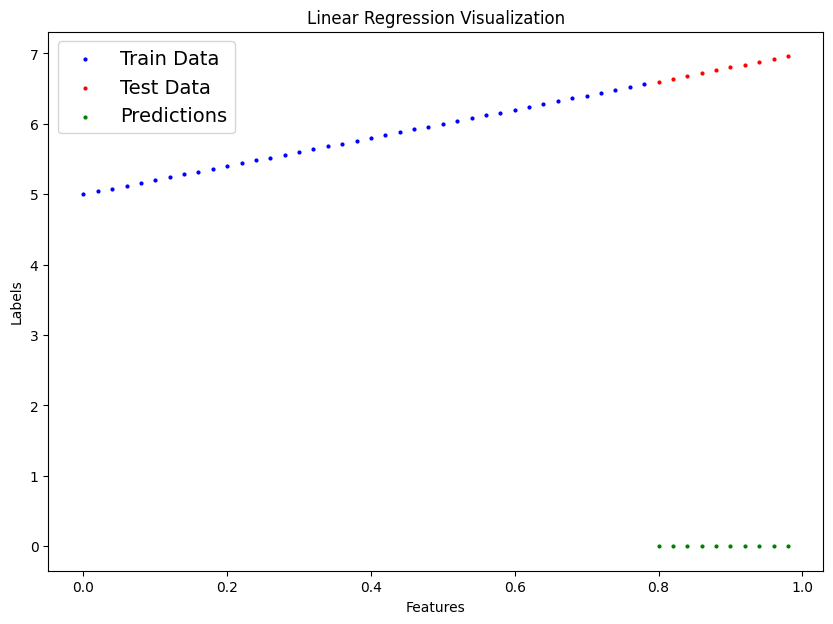

In [91]:
import torch
import matplotlib.pyplot as plt

# STEP 1: CREATE WT,BIAS ,INPUT, OUTPUT
wt = 2
bias = 5

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)  # Created Inputs
y = wt * x + bias                             # Created Outputs

# STEP 2: SPLIT INTO TRAINING AND TEST SET
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

# Dummy predictions (placeholder same shape as y_test)
predictions = torch.zeros_like(y_test)

# STEP 3: PLOTTING FUNCTION
def plot(train_data=x_train, train_labels=y_train,
         test_data=x_test, test_labels=y_test,
         predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train Data")
    plt.scatter(test_data, test_labels, c='r', s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.title("Linear Regression Visualization")
    plt.show()

# Call the function and pass predictions
plot(predictions=predictions)


In [92]:
#STEP 4 CREATING A MODEL
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

# STEP 5 CHECKING CONTENTS IN MODEL

torch.manual_seed(42)
model_0= LinearRegression()
model_0.state_dict()


#STEP 6 IDEAL VALUES
weight=10
bias=2

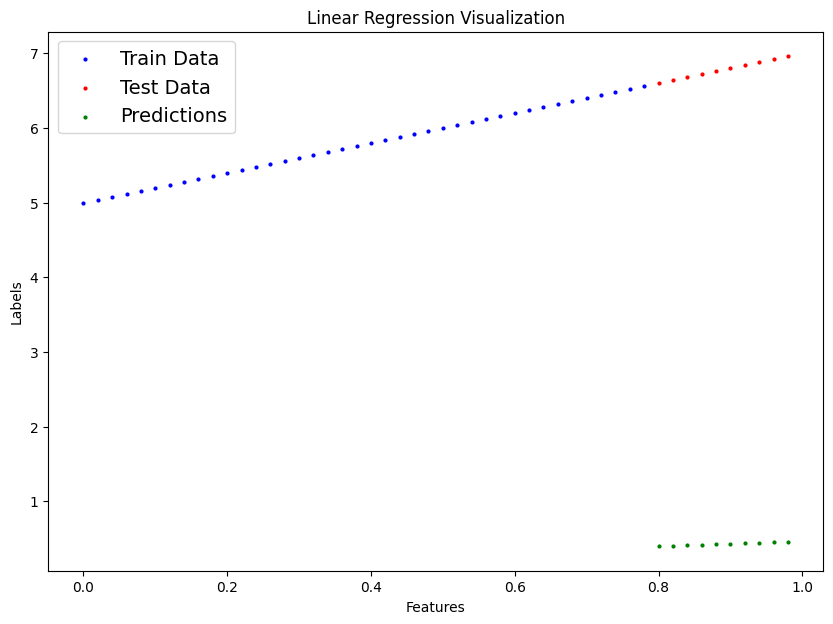

In [93]:
#STEP 7 MAKING PREDICTIONS
with torch.inference_mode():
  prediction=model_0(x_test)
plot(predictions=prediction)

In [94]:
# STEP 8 LOSS FUNCTION AND OPTIMIZER
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#  STEP 9: Move these OUTSIDE the loop
epochs_count = []
train_loss_values = []
test_loss_values = []

#  Train for more than 1 epoch
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test)

        # ✅ Store values every epoch or every 10 epochs
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_values.append(loss.item())      # convert from tensor to float
            test_loss_values.append(test_loss.item())  # convert from tensor to float
            print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch: 0 | Train Loss: 5.5199 | Test Loss: 6.3381
Epoch: 10 | Train Loss: 5.4047 | Test Loss: 6.2034
Epoch: 20 | Train Loss: 5.2895 | Test Loss: 6.0686
Epoch: 30 | Train Loss: 5.1743 | Test Loss: 5.9339
Epoch: 40 | Train Loss: 5.0590 | Test Loss: 5.7992
Epoch: 50 | Train Loss: 4.9438 | Test Loss: 5.6645
Epoch: 60 | Train Loss: 4.8286 | Test Loss: 5.5298
Epoch: 70 | Train Loss: 4.7134 | Test Loss: 5.3951
Epoch: 80 | Train Loss: 4.5982 | Test Loss: 5.2604
Epoch: 90 | Train Loss: 4.4830 | Test Loss: 5.1257


In [95]:
weight,bias

(10, 2)

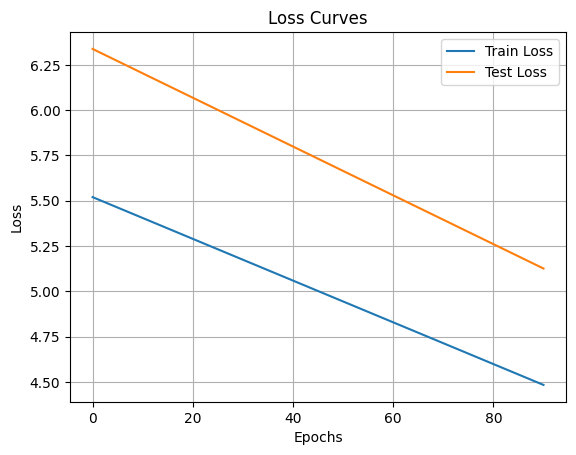

In [96]:
import matplotlib.pyplot as plt

plt.plot(epochs_count, train_loss_values, label="Train Loss")
plt.plot(epochs_count, test_loss_values, label="Test Loss")
plt.title("Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [97]:
test_loss_values

[6.338065147399902,
 6.203355312347412,
 6.068645477294922,
 5.933935642242432,
 5.799225807189941,
 5.664515972137451,
 5.529806137084961,
 5.395096302032471,
 5.2603864669799805,
 5.125676155090332]

In [99]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="pytorch_linear_regression_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)